# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [3]:
df.head()

,p1,p2
0,6.964692,7.943428
1,2.861393,5.099537
2,2.268515,0.974429
3,5.513148,4.474359
4,7.194690,8.938402


Definição da matriz de transformação

In [28]:
#obs: a primeira linha da matriz serve para cálculo das médias, enquanto a segunda para cálculo das diferenças

matriz_media = np.array([ [ 0.5, 0.5],
                          [-1.0, 1.0] ])

**Cálculo da média e diferença através de multiplicação matricial**

In [33]:
matriz_notas = df[['p1', 'p2']].to_numpy().transpose()

mat_media_dif = np.matmul(matriz_media, matriz_notas)

df['media']     = mat_media_dif[0]
df['diferenca'] = mat_media_dif[1]

df.head()

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,0.978736
1,2.861393,5.099537,3.980465,2.238143
2,2.268515,0.974429,1.621472,-1.294085
3,5.513148,4.474359,4.993754,-1.038788
4,7.194690,8.938402,8.066546,1.743712


**Correlação entre os dados p1 e p2**

In [35]:
df['p1'].corr(df['p2'])

0.8957365818728046

**Correlação entre a média e a diferença**

In [36]:
df['media'].corr(df['diferenca'])

0.13347385411788837

**Conclusões:**

1. Pode-se observar que a correlação entre as notas **P1** e **P2** são muito altas, alunos que tiram uma nota alta na **P1** também costumam tirar na **P2**.
    <br>
2. O inverso também é verdade, alunos que tiram uma nota menor em uma das provas, também costumam tirar nota baixa na outra.
    <br>
3. Por outro lado, a correlação entre a **média** e a **diferença** é muito baixa, o que faz sentido, visto que: 

    - Se a correlação entre **P1** e **P2** é alta, significa que ambas crescem ou diminuem com certa igualdade.
    - A **média** cresce conforme ambas as notas crescem igualmente, enquanto a **diferença** cresce conforme as notas se distanciam.
    - **P1** e **P2** tem um crescimento conjunto, enquanto a **média** também cresce junto delas. Mas a **diferença** cresce conforme uma nota cresce mais do que a outra. Portanto, não faria sentido a **diferença** e a **média** terem uma boa correlação.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

Definição da matriz de transformação

In [39]:
mat = np.array([1, 1])

df['p1'].head() + df['p2'].head()

0    14.908120
1     7.960930
2     3.242944
3     9.987507
4    16.133092
dtype: float64

Cálculo da soma de **p1** e **p2** através da multiplicação de matrizes

In [55]:
matriz_notas = df[['p1', 'p2']].to_numpy().transpose()

matriz_soma_notas = np.matmul(mat, matriz_notas)

df['soma_notas'] = matriz_soma_notas

**Exibição do gráfico**

Pode-se oberservar que assim como a média, a soma não apresenta uma correlação com a diferença. O que faz sentido, visto que são operações opostas.

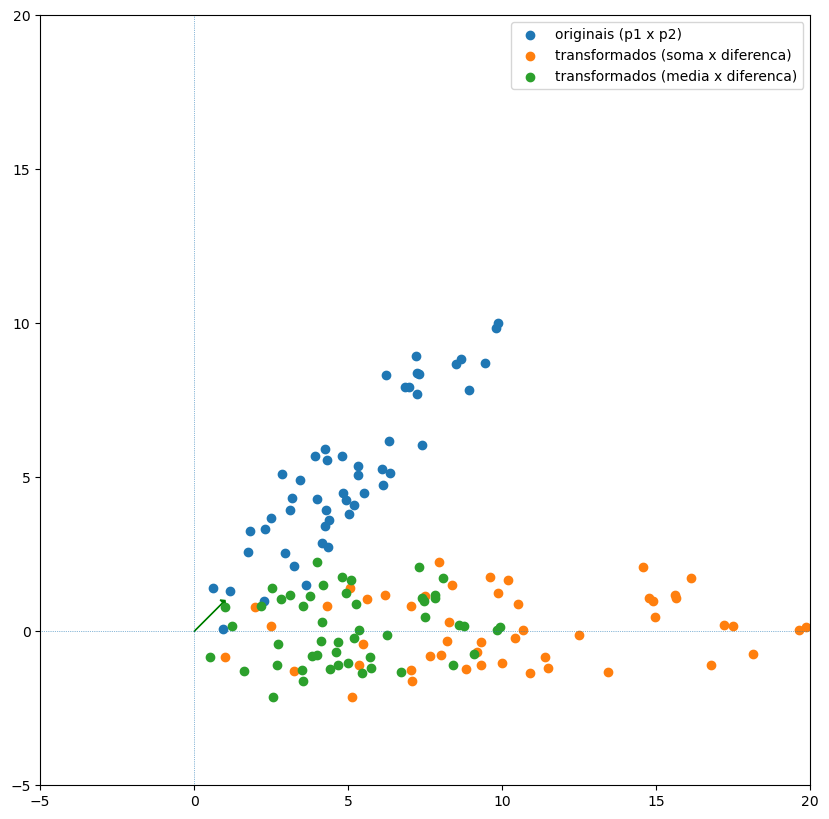

In [68]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

ax.set_aspect('equal', 'box')
ax.set(xlim=(-5, 20), ylim=(-5, 20))

ax.axhline(0, linestyle=':', linewidth=0.5)
ax.axvline(0, linestyle=':', linewidth=0.5)

ax.arrow(0, 0, 1, 1
         , head_width=0.25
         , head_length=0.1
         , fc='g', ec='g', 
         length_includes_head=True)

# P1 x P2
plt.scatter(df['p1'], df['p2'], label='originais (p1 x p2)')

# Soma X Diferenca
plt.scatter(df['soma_notas'], df['diferenca'], label='transformados (soma x diferenca)')

# Media X Diferenca
plt.scatter(df['media'], df['diferenca'], label='transformados (media x diferenca)')

plt.legend()